In [1]:
import os
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
from PIL import Image
import torch
import torch.nn as nn
class data_load(Dataset):
    def __init__(self,folder_path,transform):
        self.folder_path = folder_path
        self.transform = transform
        self.x , self.y = self.folder_reader()
    def folder_reader(self):
        sub_folder = [sub_folders for sub_folders in os.listdir(self.folder_path) if os.path.isdir(os.path.join(self.folder_path,sub_folders))]
        items = {i:sub_folder[i] for i in range(len(sub_folder)) }
        print(items)
        x = [os.path.join(self.folder_path,sub_folders,image) for sub_folders in sub_folder for image in os.listdir(os.path.join(self.folder_path,sub_folders))]
        y = [i for i in range(len(items)) for file_name in x if file_name.split('/')[-2]==items.get(i)]
        #print(y)
        
        return x , torch.tensor(y,dtype=torch.long)

    def __len__(self):
        return len(self.x)

    def __getitem__(self,index):
        img = Image.open(self.x[index])
        if self.transform:
            image = self.transform(img)
        labels = self.y[index]
        return image,labels


transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor()
])

data = data_load(folder_path='/kaggle/input/dog-breed-image-dataset/dataset',transform=transform)
dataloader = DataLoader(data,batch_size=1,num_workers=1,shuffle=True)



{0: 'Beagle', 1: 'Labrador_Retriever', 2: 'Golden_Retriever', 3: 'German_Shepherd', 4: 'Rottweiler', 5: 'Poodle', 6: 'Bulldog', 7: 'Boxer', 8: 'Yorkshire_Terrier', 9: 'Dachshund'}


In [2]:

class ConvolutionNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(ConvolutionNN,self).__init__()
        self.con1 = nn.Conv2d(3,6,5)
        self.con2 = nn.Conv2d(6,16,5)
        self.pool = nn.MaxPool2d(2,2)

        self.hid1 = nn.Linear(input_size,hidden_size)
        self.hid2 = nn.Linear(hidden_size,hidden_size)
        self.output = nn.Linear(hidden_size,output_size)

        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.pool(self.relu(self.con1(x)))
        x = self.pool(self.relu(self.con2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.relu(self.hid1(x))
        x = self.relu(self.hid2(x))
        return self.relu(self.output(x))


model = ConvolutionNN(400,2*400,17)
model

ConvolutionNN(
  (con1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (con2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (hid1): Linear(in_features=400, out_features=800, bias=True)
  (hid2): Linear(in_features=800, out_features=800, bias=True)
  (output): Linear(in_features=800, out_features=17, bias=True)
  (relu): ReLU()
)

In [3]:
loss = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(),lr=0.01)

ephoc=1000
for ephocs in range(ephoc):
    for image,label in dataloader:
        optim.zero_grad()
        y_out = model(image)
        err = loss(y_out,label)
        err.backward()
        optim.step()
    if(ephocs%50==0):
        print(f"EPHOCS: {ephocs+1}/{ephoc}  -- LOSS: {err.item()}")

EPHOCS: 1/1000  -- LOSS: 3.115692138671875
EPHOCS: 51/1000  -- LOSS: 6.4490144723095e-05
EPHOCS: 101/1000  -- LOSS: 1.2636104656849056e-05
EPHOCS: 151/1000  -- LOSS: 1.6569954823353328e-05
EPHOCS: 201/1000  -- LOSS: 1.0490362910786644e-05
EPHOCS: 251/1000  -- LOSS: 2.7418097943154862e-06
EPHOCS: 301/1000  -- LOSS: 2.264974000354414e-06
EPHOCS: 351/1000  -- LOSS: 1.1920928244535389e-07
EPHOCS: 401/1000  -- LOSS: 4.768370445162873e-07
EPHOCS: 451/1000  -- LOSS: 0.0
EPHOCS: 501/1000  -- LOSS: 0.0


KeyboardInterrupt: 

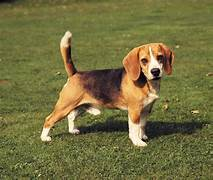

In [21]:
import urllib.request
urllib.request.urlretrieve('https://tse4.mm.bing.net/th?id=OIP.AGUgmsf0aYavwNxxSKySRgAAAA&pid=Api&P=0&h=180',"gs.jpg")
image = Image.open("gs.jpg")
image

In [22]:
image = transform(image).unsqueeze(0)

with torch.no_grad():
    out = model(image)
    _, prediction = torch.max(out,1)
    dictt = {
        0: 'Beagle',
        1: 'Labrador_Retriever',
        2: 'Golden_Retriever',
        3: 'German_Shepherd',
        4: 'Rottweiler',
        5: 'Poodle',
        6: 'Bulldog',
        7: 'Boxer',
        8: 'Yorkshire_Terrier',
        9: 'Dachshund'
    }
    print(f"Predicted class:  {dictt[prediction.item()]}")

Predicted class:  Beagle
